# Gene Set Enrichment Analysis

In [3]:
import pandas as pd
import numpy as np
import gseapy as gp

In [42]:
cls_file = "./data/phenotype.cls"
phenoA, phenoB, class_vector = gp.parser.gsea_cls_parser(cls_file)
phenoA, phenoB

('BrainCortex', 'GBM')

In [45]:
from collections import Counter
len(class_vector)

324

In [116]:
gene_exp = pd.read_csv("./data/GTEx_vs_TCGA_raw_counts.txt", sep="\t", index_col=0)
gene_exp["type"] = class_vector

gene_exp = pd.concat([gene_exp, pd.get_dummies(gene_exp["type"])], axis=1)
gene_exp = gene_exp.drop(["type", "DESCRIPTION"], axis=1).T

In [117]:
gene_exp.head()

Name,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-1128S-2726-SM-5H12C,GTEX-117XS-3026-SM-5N9CA,GTEX-1192X-3126-SM-5N9BY,GTEX-11DXW-1126-SM-5H12Q,GTEX-11DXY-3226-SM-5GIDE,GTEX-11EI6-3026-SM-5GZZO,GTEX-11EMC-3226-SM-5EGKW,GTEX-11GS4-3126-SM-5A5LH,...,TCGA-41-3915-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-41-5651-01A-01R-1850-01,TCGA-76-4925-01A-01R-1850-01,TCGA-76-4926-01B-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4929-01A-01R-1850-01,TCGA-76-4931-01A-01R-1850-01,TCGA-76-4932-01A-01R-1850-01
WASH7P,1042,745,527,807,808,544,375,540,516,400,...,1863,1676,2340,4103,1865,867,1504,2288,5189,1819
OR4F5,3,1,1,1,1,3,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
OR4F29,1,2,1,0,1,2,1,4,5,1,...,0,5,4,3,2,2,0,1,1,0
FAM41C,7,15,13,17,9,9,8,8,10,8,...,12,6,10,37,31,31,26,21,54,26
SAMD11,58,53,107,128,118,56,38,139,106,91,...,27,8,92,9,3,57,10,77,139,27


In [118]:
high_exp = gene_exp[gene_exp.mean(axis=1) > 10000]

In [120]:
high_exp

Name,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-1128S-2726-SM-5H12C,GTEX-117XS-3026-SM-5N9CA,GTEX-1192X-3126-SM-5N9BY,GTEX-11DXW-1126-SM-5H12Q,GTEX-11DXY-3226-SM-5GIDE,GTEX-11EI6-3026-SM-5GZZO,GTEX-11EMC-3226-SM-5EGKW,GTEX-11GS4-3126-SM-5A5LH,...,TCGA-41-3915-01A-01R-1850-01,TCGA-41-4097-01A-01R-1850-01,TCGA-41-5651-01A-01R-1850-01,TCGA-76-4925-01A-01R-1850-01,TCGA-76-4926-01B-01R-1850-01,TCGA-76-4927-01A-01R-1850-01,TCGA-76-4928-01B-01R-1850-01,TCGA-76-4929-01A-01R-1850-01,TCGA-76-4931-01A-01R-1850-01,TCGA-76-4932-01A-01R-1850-01
AGRN,8178,13364,8972,18704,15052,12649,10142,10311,7714,11203,...,10686,7011,9424,10147,4544,11717,11860,6809,15851,14694
ACAP3,20357,21945,19301,28675,25807,20414,13649,16888,13487,20576,...,2852,2097,6115,3104,2067,1720,2818,2493,10000,3769
GNB1,27406,39272,42251,50171,35028,41795,32428,41734,35012,23146,...,16036,13989,19290,32280,24789,13805,23799,19770,23507,32439
KCNAB2,33009,35615,43347,57259,28235,43731,29449,38590,33960,23700,...,894,1392,935,433,1840,258,669,911,1193,469
CHD5,18171,29899,29118,47640,22485,39926,24246,23716,17758,20112,...,53,699,452,12,670,29,36,2,646,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PDZD4,39963,35914,49799,68735,35358,45306,34407,54672,49441,26257,...,2252,1769,5749,3637,4016,1674,2311,4620,6135,2472
FLNA,11404,8639,9548,11404,14406,9569,8171,11865,13659,6703,...,49132,35574,13400,45574,24754,18868,38403,17857,25998,21685
RPL10,21514,19136,15995,20125,19730,15769,12588,17109,16400,13397,...,8946,4632,8867,11732,8196,6427,13479,6054,9429,12550
ATP6AP1,10019,12337,11229,20876,12013,15249,13016,12410,7553,10204,...,7589,7879,7663,14613,7155,6836,14798,7890,8057,10861


In [125]:
gs_res = gp.gsea(data=high_exp, # or data='./P53_resampling_data.txt'
                 gene_sets="GO_Biological_Process_2018", # enrichr library names: check https://amp.pharm.mssm.edu/Enrichr/#stats
                 cls=cls_file, # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=50, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=2, seed=7,
                 format='png')

In [126]:
gs_res.res2d.sort_values("fdr").head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
phosphorylation (GO:0016310),0.709493,3.991213,0.000000,0.007795,387,19,DGKZ;CAMK2A;BRSK1;PRKAR1B;TNK2;CAMK2B;CAMKK2;P...,DGKZ;CAMK2A;BRSK1;PRKAR1B;TNK2;CAMK2B;CAMKK2;P...
protein phosphorylation (GO:0006468),0.616060,3.287079,0.000000,0.233862,471,19,CAMK2A;BRSK1;PRKAR1B;CAMK2B;CAMKK2;PKD1;PTK2B;...,CAMK2A;BRSK1;PRKAR1B;CAMK2B;CAMKK2;PKD1;PTK2B;...
axon guidance (GO:0007411),0.616634,3.388214,0.000000,0.239709,159,18,SHANK3;KIF5A;KIF5C;SPTBN2;RAP1GAP;CYFIP2;CHN1;...,SHANK3;KIF5A;KIF5C;SPTBN2;RAP1GAP;CYFIP2;CHN1;...
vesicle-mediated transport (GO:0016192),0.576788,3.443047,0.000000,0.252051,411,33,KIF1A;KIF5A;AGAP3;GIT1;STX1B;MAPK8IP3;DNM1;SPT...,KIF1A;KIF5A;AGAP3;GIT1;STX1B;MAPK8IP3;DNM1;SPT...
neuron projection morphogenesis (GO:0048812),0.494890,3.308861,0.035088,0.265044,164,22,MAPK8IP2;SHANK3;PACSIN1;BRSK1;DLG4;RAB3A;MAP1A...,MAPK8IP2;SHANK3;PACSIN1;BRSK1;DLG4;RAB3A;MAP1A...


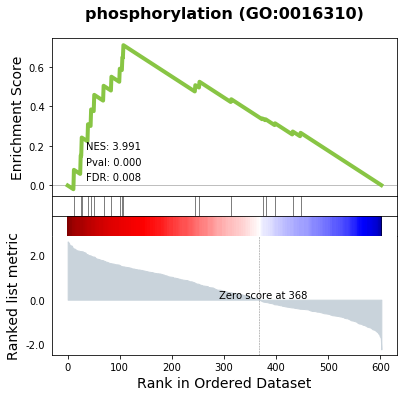

In [127]:
from gseapy.plot import gseaplot
terms = gs_res.res2d.index
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(gs_res.ranking, term=terms[0], **gs_res.results[terms[0]])

## Practices

* 試試看不同的gene sets。
* 把 GBM v.s. BrainCortex 的 DE-Genes 放進 GSEA 看看有哪些功能有顯著的Enrichment Score?